In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

df = pd.read_csv("./datasets/shopping_behavior_updated.csv")

### 1.Sample 

The first step in SEMMA is Sampling.
Sampling is the process of selecting a smaller, representative subset of the data for analysis.

In [2]:
df.shape

(3900, 18)

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

We load the dataset and took a quick look at its structure—its shape, columns, and data types. Since our dataset is small and clean, we will use the entire dataset for our analysis. Check for missing and duplicated data.
Next, we need to decide what we want to predict. Since this is a shopping behavior dataset, a common and insightful prediction is to determine the most important factors influencing a high Purchase Amount (USD)

### 2. Explore

The next step is Explore.
Here, we visually and statistically examine the data to discover patterns, anomalies, and relationships.

Since we have both numerical and categorical features, we need different methods for each:

Numerical Features: We'll check the distribution of the target variable, Purchase Amount (USD), and other key numerical features (Age, Previous Purchases, Review Rating). Histograms and box plots are ideal.

Categorical Features: We'll look at the counts/proportions of each unique value (levels) to ensure they are balanced and don't have too many rare categories. We also need to see how each category relates to the tar  get variable using bar plots or box plots.

In [5]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


numerical_cols = ['Age', 'Review Rating', 'Previous Purchases', 'Purchase Amount (USD)']
print("--- Descriptive Statistics of Numerical Features (Training Set) ---")
print(df[numerical_cols].describe())

--- Descriptive Statistics of Numerical Features (Training Set) ---
               Age  Review Rating  Previous Purchases  Purchase Amount (USD)
count  3900.000000    3900.000000         3900.000000            3900.000000
mean     44.068462       3.749949           25.351538              59.764359
std      15.207589       0.716223           14.447125              23.685392
min      18.000000       2.500000            1.000000              20.000000
25%      31.000000       3.100000           13.000000              39.000000
50%      44.000000       3.700000           25.000000              60.000000
75%      57.000000       4.400000           38.000000              81.000000
max      70.000000       5.000000           50.000000             100.000000


Key Insights:

Purchase Amount (USD): The average purchase is about **$60.14**. The standard deviation ($23.68) is large, suggesting a wide spread of purchase values, which we can see clearly in the histogram. The values range from $20 to $100.

Age: The ages are well-distributed across the range of 18 to 70, with a mean of about 44.

Previous Purchases: This is also evenly distributed (mean of 25.40, max of 50).

Review Rating: Ratings are spread between 2.5 and 5.0, with an average around 3.75.

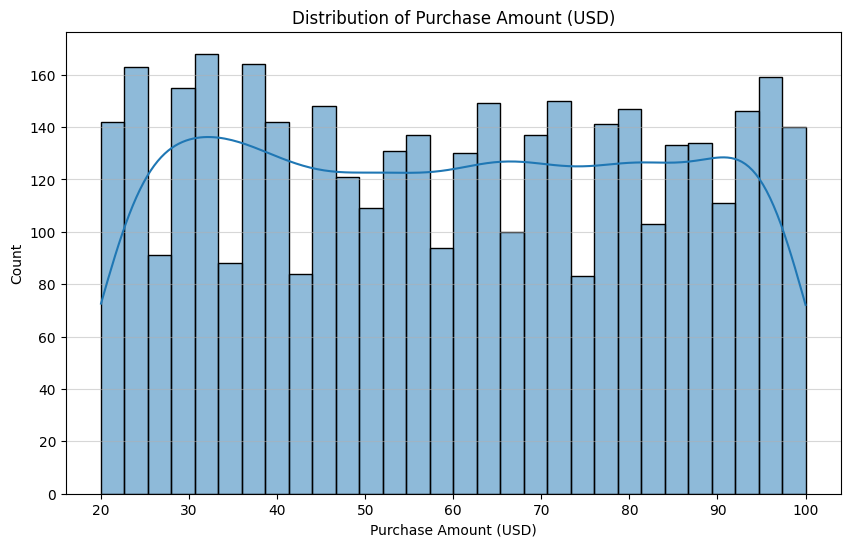

In [8]:
# Visualize the distribution of the target variable: Purchase Amount (USD)
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=30)
plt.title('Distribution of Purchase Amount (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)
plt.show() 

The histogram of Purchase Amount (USD) shows a distribution that is remarkably uniform.Uniform Distribution: This means purchases are almost equally likely across the entire range from $20 to $100. There are no major clusters or peaks (like most people spending $50 or $80).Modeling Implication: A uniform target variable can make regression modeling slightly challenging, as there isn't one clear 'average' value that most customers gravitate toward. Our model will have to rely heavily on the features (the $X$ variables) to differentiate between a low purchase amount ($20) and a high one ($100).

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

print("--- Cardinality (Unique Counts) of Categorical Features (Training Set) ---")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")



--- Cardinality (Unique Counts) of Categorical Features (Training Set) ---
Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


Features like Location, Item Purchased, and Color have many unique values. If we encode these features directly, we might create hundreds of new columns, which can complicate the model.

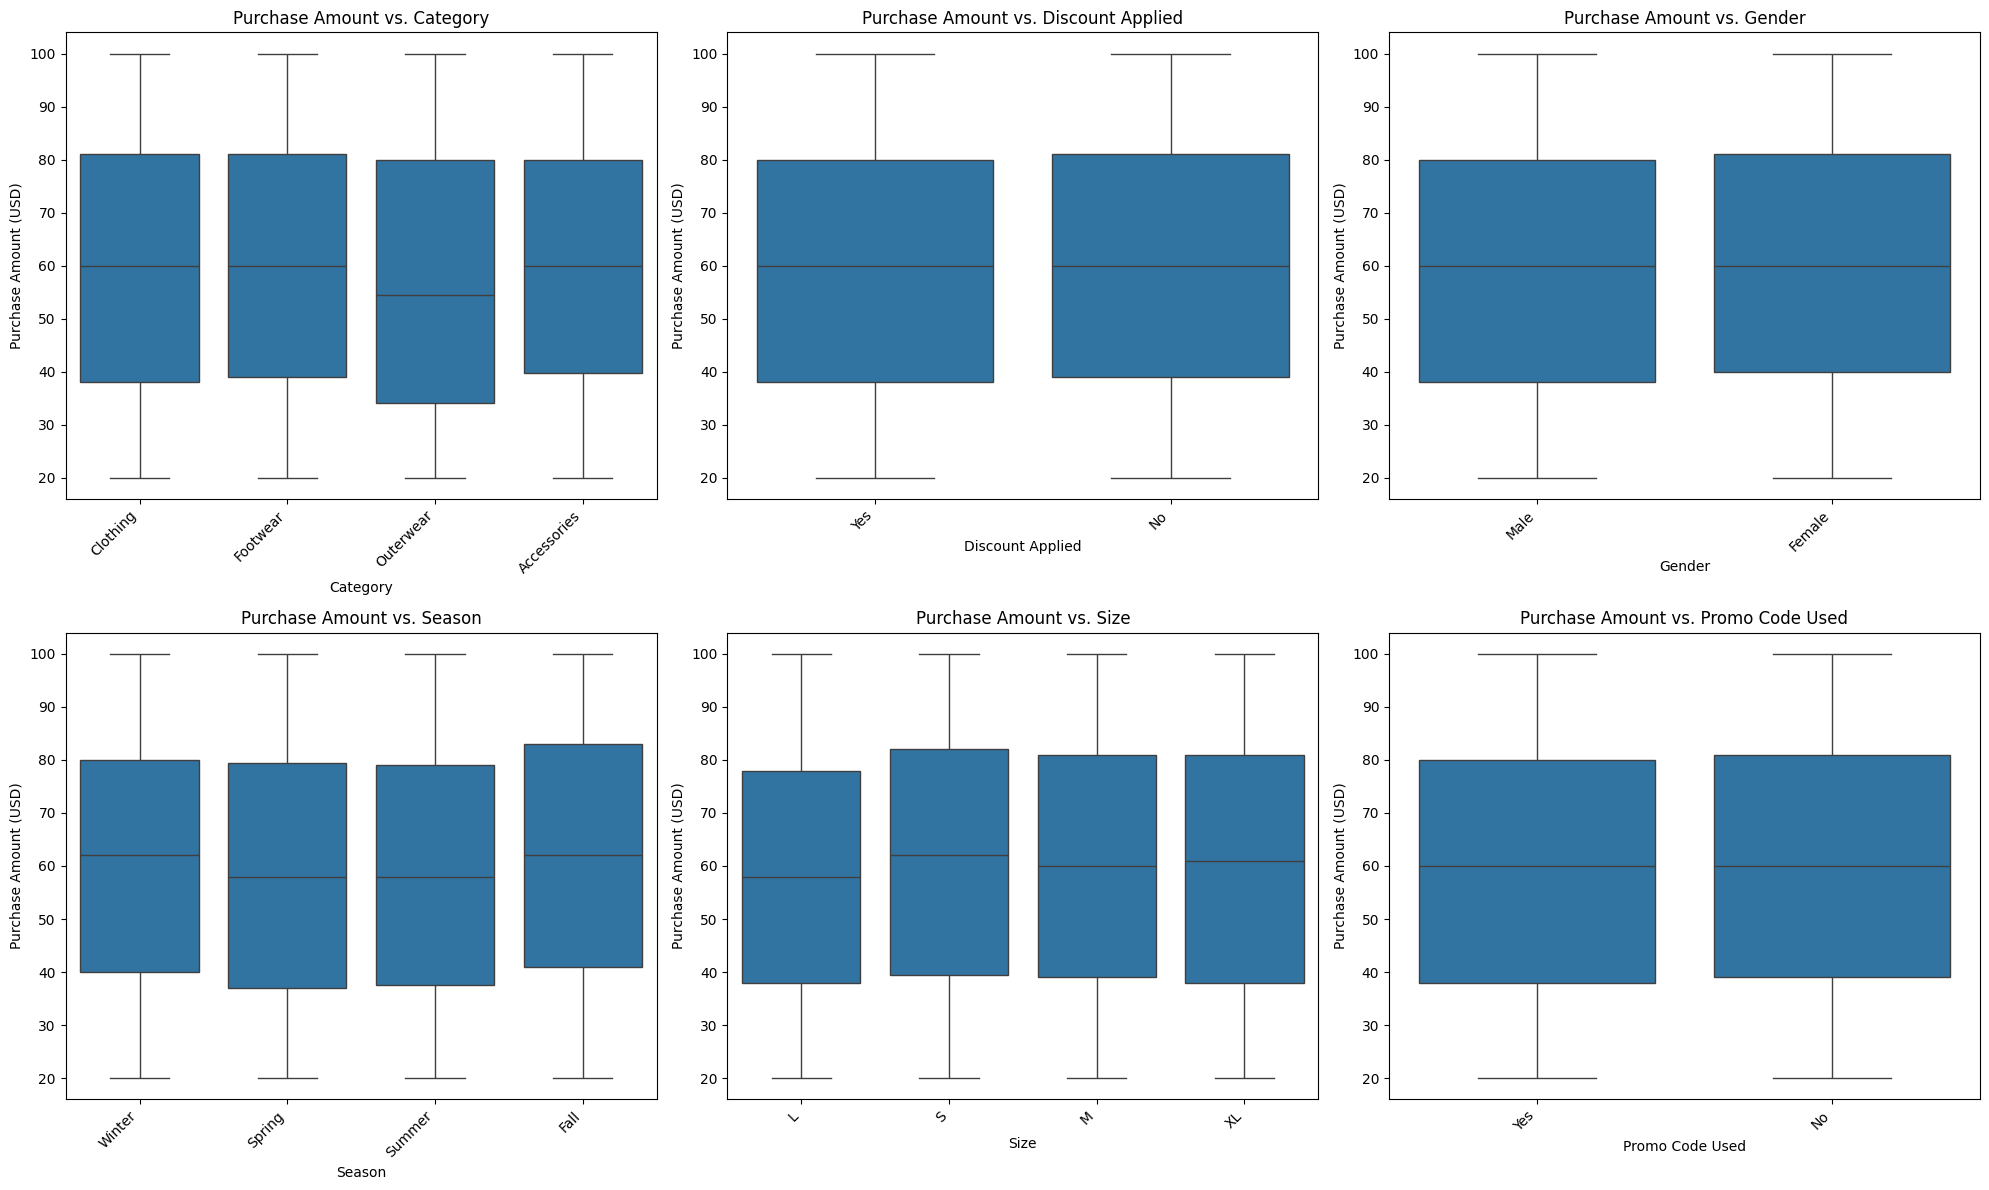

In [10]:
cols_to_plot = ['Category', 'Discount Applied', 'Gender', 'Season', 'Size', 'Promo Code Used']

# Create box plots for the relationship between categorical features and the target

plt.figure(figsize=(20, 12))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i+1)
    # Using boxplot to show the distribution of Purchase Amount (USD) across categories
    sns.boxplot(x=col, y='Purchase Amount (USD)', data=df)
    plt.title(f'Purchase Amount vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Purchase Amount (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show() 

The median purchase amount (the line in the middle of the box) is almost identical for all categorical features (around $60), and the spread (the height of the box) is also similar.
This suggests that none of the categorical features by itself may not be a strong predictor of the purchase amount.

### 3. Modify
The Modify step is where we prepare the data for the model. This is the most crucial step for ensuring model quality.

Modification involves transforming the raw data into a format that a mathematical model can understand and process effectively. This includes:

Feature Encoding: Converting categorical (text) variables into numerical ones.

Feature Scaling: Standardizing numerical variables (optional, but often helpful).

Feature Selection/Engineering: Creating new features or dropping problematic ones

In [11]:
from sklearn.model_selection import train_test_split

target = 'Purchase Amount (USD)'
features = df.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(
            features, df[target], test_size=0.2, random_state=42
         )

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_cols = ['Age', 'Review Rating', 'Previous Purchases']

categorical_keep_cols = [
    'Gender', 'Category', 'Size', 'Season', 'Subscription Status',
    'Shipping Type', 'Discount Applied', 'Promo Code Used',
    'Payment Method', 'Frequency of Purchases'
]
columns_to_drop = ['Item Purchased', 'Location', 'Color']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('drop', 'drop', columns_to_drop)
    ],
    remainder='passthrough'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


### 4.Model

We have successfully completed the modification step. Our features are now numerical and scaled, ready for the machine learning algorithm.

As discussed, we will use a Random Forest Regressor to predict the continuous numerical target variable, Purchase Amount (USD).

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5. Assess
The final step in SEMMA is Assess, where we evaluate how well our trained model performs.

Prediction: First, we use the trained model to predict the purchase amounts for the unseen test data ($\mathbf{X}_{test\_processed}$).

Metrics: 
We compare these predictions ($\mathbf{Y}_{pred}$) against the actual values ($\mathbf{Y}_{test}$).

    $R^2$ Score (Coefficient of Determination): This is the most common metric. It measures the proportion of the variance in the target variable that is predictable from the features.

        Range: $0$ to $1$.
        Interpretation: $R^2$ of $1.0$ means the model perfectly predicts the target. $R^2$ of $0.0$ means the model is no better than simply predicting the average purchase amount for every customer.
    
    Mean Absolute Error (MAE): This measures the average magnitude of the errors in a set of predictions, without considering their direction (i.e., whether the prediction was too high or too low).
        Interpretation: If MAE is 5, it means, on average, the model's prediction is off by $5.00. This is the most interpretable metric in the target's original units.
        
    Root Mean Squared Error (RMSE): Similar to MAE, but it penalizes larger errors more heavily. It's often used because it's in the same units as the target.

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model', 'X_test_processed', 'Y_test', 'preprocessor',
# 'numerical_cols', and 'categorical_keep_cols' are defined from previous steps.

# --- 1. Predict on the Test Set ---
# Use the trained model to make predictions on the unseen test features
y_pred = model.predict(X_test_processed)

# --- 2. Calculate Assessment Metrics ---

# R-squared Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Assessment Metrics ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

--- Assessment Metrics ---
R-squared (R²): -0.0518
Mean Absolute Error (MAE): $21.09
Root Mean Squared Error (RMSE): $24.26


Our model is essentially failing to learn any meaningful relationship. Why?

Uniform Target Distribution (from Explore): The target variable, Purchase Amount (USD), was uniformly distributed. This means there is no central tendency or easy-to-find cluster.

Weak Feature Relationships (from Explore): During the EDA, we saw that key features like Category, Gender, and Discount Applied had almost identical purchase amount distributions.

Missing High-Cardinality Information: We dropped Item Purchased, Location, and Color. These unique identifiers often contain crucial information that drives differences in price, and our model is suffering without them.Example: If all Outerwear items are jackets costing $\approx\$80$, and all Accessories are socks costing $\approx\$30$, the model can learn this. But our EDA showed Category was not helpful. The specific item (Item Purchased) might have provided the missing signal.